In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.shape

(31647, 18)

This dataset contains 31647 rows and 18 columns

Let's check for nulls in the dataset

In [5]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

This dataset doesnot contain Null values

In [6]:
df.duplicated().sum()

0

This dataset doesnot contain duplicate values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Let's check the statistical information of the data

In [9]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In Age feature there is huge difference between 75% and max vales, there can be outliers

In Balance feature, mean is higer than 50% data. So, data can be right skewed and huge difference between 75% and max data. So, there can be outliers present.

In Duration feature, mean is greater than 50% data. So, data is right skewed and huge difference between 75% and max data.So, outliers can be present.


In [10]:
df.job.unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [11]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [12]:
df['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [13]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [17]:
df['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [18]:
df['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [19]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

Job,Admin,Education,default,contact,poutcome features are categorical columns. Let's encode them using encoding techniques.

In [20]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [21]:
cat_columns=['job','marital','education','default','poutcome','subscribed','housing','loan','month','contact']

for i in cat_columns:
    df[i]=LE.fit_transform(df[i])
    
    

In [22]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


With the help of LabelEncoder, we have encoded all categorical columns

Let's check how the data is distributed

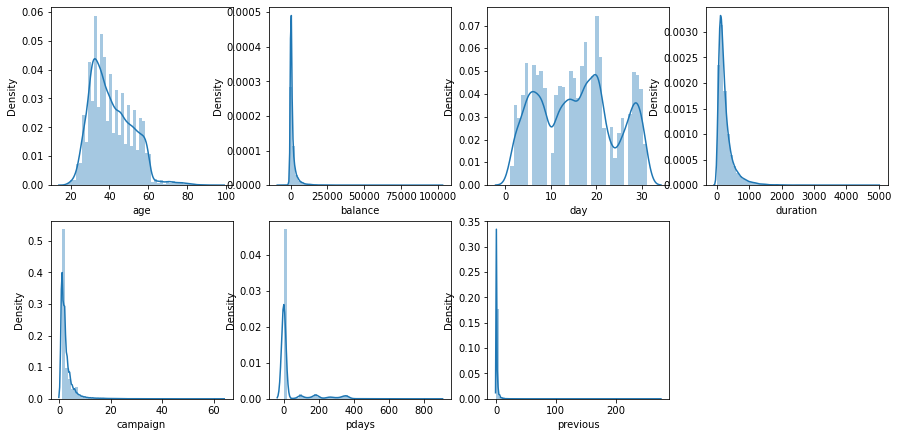

In [23]:
cols=['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15,19))
n=1
for i in cols:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe skeweness in Balance, duration,campaign,pdays,previous

In [24]:
df.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

Let's use transformation techniques to reduce skeweness.

In [25]:
df['balance']=np.cbrt(df['balance'])
df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])
df['age']=np.cbrt(df['age'])

In [26]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age         0.286363
balance    -0.086014
day         0.087185
duration    0.647275
campaign    1.667938
pdays       1.779036
previous    2.079738
dtype: float64

From the above we observe campaign,pdays,previous features having value not in acceptable range.
So, let's again perform techniques to remove skeweness

In [27]:
from scipy.stats import boxcox

a=boxcox(df['campaign'])[0]
df['campaign']=a
df['campaign'].skew()
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])

In [28]:
df[['campaign','pdays','previous']].skew()

campaign    0.165947
pdays       1.669181
previous    1.695184
dtype: float64

After performing power transformation technique value in campaign feature is reduced. But there is no much change in pdays and previou.
Let's continue further with this data only.

Let's check for outliers present in the dataset

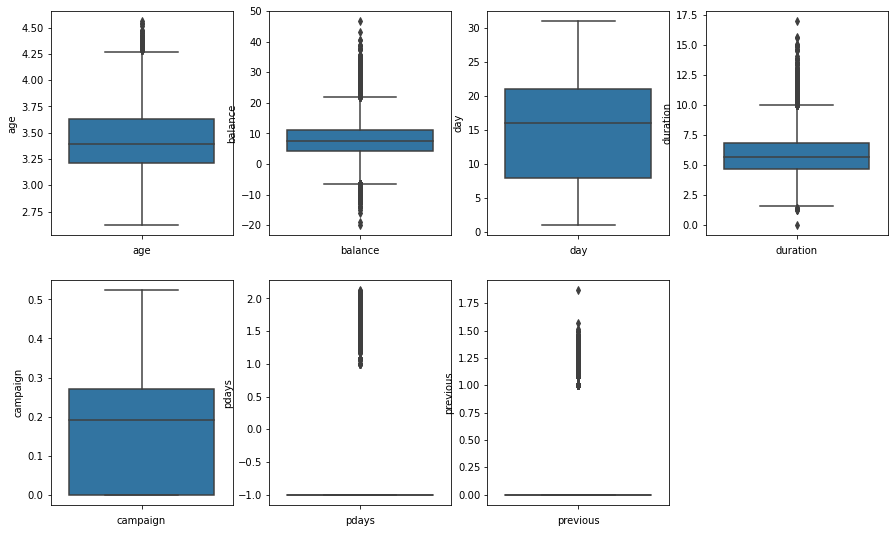

In [29]:
cols=['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15,19))
n=1
for i in cols:
    ax=plt.subplot(4,4,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

Outliers are present in almost all features except data. Let's remove outliers with the help of zscore technique

In [30]:
from scipy.stats import zscore
z_value=np.abs(zscore(df[['age','balance','duration','pdays','previous']]))
z_value>3

,age,balance,duration,pdays,previous
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
31642,False,False,False,False,False
31643,False,False,False,False,False
31644,False,False,False,False,False
31645,False,False,False,False,False


In [31]:
df1=df[(z_value<3).all(axis=1)]

In [32]:
df1.shape

(31174, 18)

We have removed outliers from the dataset. Let's check the correlation of the features.

As per my observation ID feature does not contribute for predicting target variable. Let's drop that feature

In [33]:
df1.drop('ID',axis=1,inplace=True)

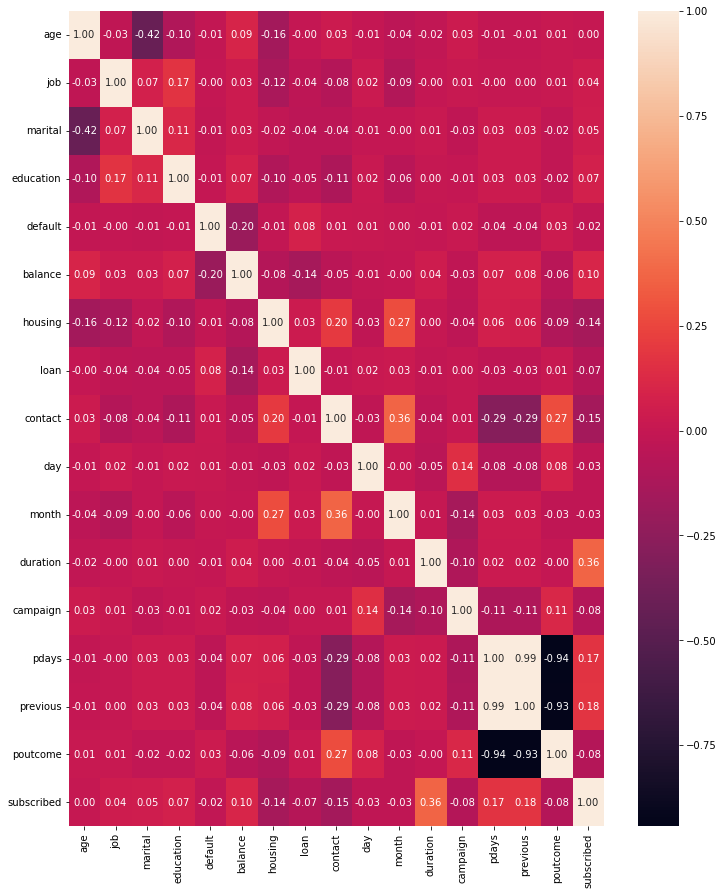

In [34]:
plt.figure(figsize=(12,15))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

From the above we can observe all features are positivle and negatively correlated with target variable.

pdays and previous are highly correlated with each other.

pdays and previous are highly negatively correlated with poutcome.

As, per my observation there is multi colliniearity problem. Let's confirm this by calculating vif value.

In [35]:
x=df1.drop('subscribed',axis=1)
y=df1['subscribed']

In [36]:
y.value_counts()

0    27649
1     3525
Name: subscribed, dtype: int64

From the above we can observe there is class imbalance problem. Let's balance the data in the data set with the help of sampling techniques

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
Vif

,Features,vif value
0,age,71.227104
1,job,2.864876
2,marital,4.865509
3,education,3.870093
4,default,1.065136
5,balance,2.516360
6,housing,2.503136
7,loan,1.228377
8,contact,2.015741
9,day,4.700798


From the above we can observe previous,pdays,poutcome,age  are having high value.
Let's drop pdays feature and again check the values.

In [39]:
x.drop('pdays',axis=1,inplace=True)

In [40]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
Vif

,Features,vif value
0,age,59.678858
1,job,2.861735
2,marital,4.773300
3,education,3.862501
4,default,1.065083
5,balance,2.516357
6,housing,2.498779
7,loan,1.226965
8,contact,2.015286
9,day,4.694448


Now, Vif values are reduced.
age,poutcome features are high vif values.
As per my observation from heatmap age and poutcome correlation values are in normal range. Let's continue further process for model building.

In [41]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

0    27649
1    27649
Name: subscribed, dtype: int64

Let's standardize the data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
x_scaled=scaler.fit_transform(x)

Let's find out the best random state for the dataset

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
max_acc=0
max_rand_state=0
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  25  Accuracy score -  0.9447257383966244


Best Random State is 42 and Accuracy score is 94.3%

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [49]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy Score ",acc_score_LR)

Accuracy Score  0.8501506931886679


In [50]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.9029535864978903


In [51]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.8989752863170585


In [52]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.8989752863170585


In [53]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.9142254370102472


In [54]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.9277878239903556


In [55]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.9403857745629898


In [56]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.9431585292344786


From the above we can observe, ExtraTreesClassifier is exhibiting highest accuracy score of 94.3%. Let's check accuracy score provided by the model is due to overfitting of the model.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("score ",score)
print("Mean ",score.mean())
print("Difference is ",acc_score_RFC-mean)

score  [0.85705244 0.95895118 0.95352622 0.95786237 0.9530699 ]
Mean  0.9360924219217424
Difference is  0.0042933526412474166


In [59]:
score=cross_val_score(LR,x,y)
mean=score.mean()
print("Difference is ",acc_score_LR-mean)

Difference is  0.006268043053203498


In [60]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  -0.020497462756748575


In [61]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.002829749645184898


In [62]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.003123963686252784


In [63]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.01120822879921668


In [64]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  0.00792959468151555


In [65]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.005565539995599167


From the above we can observe DecisionTree Classifier is having less score compared to other models. Let's consider this model as best fit model for the given dataset.


Let's tune the paramters and increase the accuracy score of the model

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param={'criterion':['gini','entropy'],
      'max_depth':[15,16,17,18,19],
      'min_samples_leaf':[2,3,4],
      'min_samples_split':[6,7,8]}
GSV=GridSearchCV(DTC,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 16, 17, 18, 19],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [6, 7, 8]})

In [69]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [84]:
Best_model=DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=2,min_samples_split=7)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc=accuracy_score(y_test,y_predict)
print("Accuracy score - ",acc)

Accuracy score -  0.9015672091621458


After trying multpile values for parameters of DecisionClassifier, model is unable to provide accuracy score higher than default parameters. Let's consider default parameters only.
Let's generate confusion matrix and accuracy score.

In [85]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict_DTC))

confusion_matrix
 [[7436  850]
 [ 760 7544]]


In [86]:
print("classification report \n",classification_report(y_test,y_predict_DTC))

classification report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      8286
           1       0.90      0.91      0.90      8304

    accuracy                           0.90     16590
   macro avg       0.90      0.90      0.90     16590
weighted avg       0.90      0.90      0.90     16590



Let's generate ROC curve 

In [88]:
from sklearn.metrics import roc_curve,roc_auc_score


In [89]:
fpr,tpr,treshold=roc_curve(y_test,y_predict_DTC)
print("fpr ",fpr,"\n","tpr ",tpr,"\n","treshold ",treshold,"\n")

fpr  [0.         0.10258267 1.        ] 
 tpr  [0.         0.90847784 1.        ] 
 treshold  [2 1 0] 



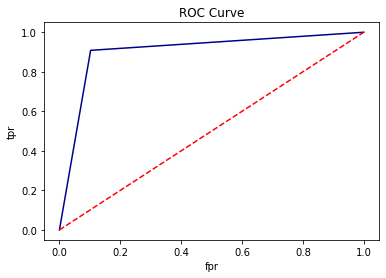

In [90]:
plt.plot(fpr,tpr,color='darkblue')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [91]:
roc_auc=roc_auc_score(y_test,y_predict_DTC)
print('Area under the curve is ',roc_auc)

Area under the curve is  0.9029475862203676


In [92]:
import pickle
file_name='Bank_application'
pickle.dump(DTC,open(file_name,'wb'))